In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
# labeled_path = '/content/drive/My Drive/mono_narrations/labeled'
labeled_path = './data'

In [4]:
df = pd.read_csv(os.path.join(labeled_path, 'minilm_labeled_narrations_v2.csv'), index_col=0)
print(df.shape)
df.head()

(7605, 11)


,email,date,balance,amount,source,type,Cluster,narration,cleaned_narration,sub_category,main_category
0,jkuuire12@gmail.com,2022-10-28 01:15:01,10546.78,2.5,Stanbic Bank,debit,0,FEE EBANKING ACH OUTWARD Tran IDS,FEE EBANKING ACH OUTWARD TRAN IDS,charges_or_fees,charges
1,jkuuire12@gmail.com,2022-10-29 01:15:06,9604.28,2.5,Stanbic Bank,debit,0,FEE EBANKING ACH OUTWARD Tran IDS,FEE EBANKING ACH OUTWARD TRAN IDS,charges_or_fees,charges
28,jkuuire12@gmail.com,2022-11-06 01:15:30,6755.07,265.0,Stanbic Bank,debit,0,VisaDirect Dstv,VISADIRECT DSTV,entertainment,shopping
47,jkuuire12@gmail.com,2022-11-15 01:15:53,4521.14,2.5,Stanbic Bank,debit,0,FEE EBANKING ACH OUTWARD Tran IDS,FEE EBANKING ACH OUTWARD TRAN IDS,charges_or_fees,charges
50,jkuuire12@gmail.com,2022-11-15 01:15:50,3523.65,2609.0,Stanbic Bank,debit,0,IB PMTINSURANCE PAYMENT,IB PMT INSURANCE PAYMENT,insurance,insurance


In [10]:
new_df = pd.read_csv('data/minilm_synth_dataset.csv', index_col=0)
print(new_df.shape)
new_df.head()

(7880, 13)


,date,currency,amount,balance,balance_cedis,amount_cedis,source,type,Cluster,narration,cleaned_narration,sub_category,main_category
0,2022-10-29 01:15:04,GHS,550.00,9906.78,9906.78,550.00,Stanbic Bank,debit,0,IB PMT USERHUB AFRICA,IB PMT USERHUB AFRICA,software,shopping
1,2022-11-01 01:15:17,GHS,1000.00,8536.69,8536.69,1000.00,Stanbic Bank,credit,0,NaN,NaN,others,others
2,2022-11-22 01:16:09,GHS,1483.69,4216.99,4216.99,1483.69,Stanbic Bank,credit,0,GOOGLE IRELAND LIMITED,GOOGLE IRELAND LIMITED,cloud services,shopping
3,2022-11-27 01:16:24,GHS,100.00,6822.72,6822.72,100.00,Stanbic Bank,debit,0,TECH NOVA BUSINESS,TECH NOVA BUSINESS,software,shopping
4,2022-11-28 01:16:26,GHS,13347.20,19869.91,19869.91,13347.20,Stanbic Bank,credit,0,FATRNOVEMBERSA,FATRNOVEMBERSA,others,others


In [11]:
new_df.fillna("None", inplace=True)
new_df.drop(labels=['amount', 'balance'], axis=1, errors='ignore', inplace=True)
new_df = new_df.rename(columns={'balance_cedis':'balance', 'amount_cedis':'amount'})
new_df.reset_index(inplace=True, drop=True)
print(new_df.shape)
new_df.head()

(7880, 11)


,date,currency,balance,amount,source,type,Cluster,narration,cleaned_narration,sub_category,main_category
0,2022-10-29 01:15:04,GHS,9906.78,550.00,Stanbic Bank,debit,0,IB PMT USERHUB AFRICA,IB PMT USERHUB AFRICA,software,shopping
1,2022-11-01 01:15:17,GHS,8536.69,1000.00,Stanbic Bank,credit,0,None,None,others,others
2,2022-11-22 01:16:09,GHS,4216.99,1483.69,Stanbic Bank,credit,0,GOOGLE IRELAND LIMITED,GOOGLE IRELAND LIMITED,cloud services,shopping
3,2022-11-27 01:16:24,GHS,6822.72,100.00,Stanbic Bank,debit,0,TECH NOVA BUSINESS,TECH NOVA BUSINESS,software,shopping
4,2022-11-28 01:16:26,GHS,19869.91,13347.20,Stanbic Bank,credit,0,FATRNOVEMBERSA,FATRNOVEMBERSA,others,others


In [17]:
new_df.sub_category.value_counts()

sub_category
mobile transfer                     1402
online payment                      1147
bank transfer                        793
charges_or_fees                      620
government tax                       486
entertainment                        388
atm withdrawal                       384
others                               269
food                                 230
transportation                       193
groceries                            192
bill payment                         171
reversals                            163
cloud services                       158
internet_and_utilities               115
interest payouts                     110
software                             104
personal care                         91
fashion                               90
salary                                86
rent                                  63
vehicle maintenance                   59
bank charges                          58
rewards                               57
fue

In [19]:
new_df["sub_category"] = np.where(new_df.sub_category.isin(["taxi", "train", "metro", "bus", "air travel", "rickshaw", "ferry", "bike sharing"]), "transportation", new_df.sub_category)
new_df.sub_category.value_counts()

sub_category
mobile transfer                     1402
online payment                      1147
bank transfer                        793
charges_or_fees                      620
government tax                       486
entertainment                        388
atm withdrawal                       384
others                               269
food                                 230
transportation                       204
groceries                            192
bill payment                         171
reversals                            163
cloud services                       158
internet_and_utilities               115
interest payouts                     110
software                             104
personal care                         91
fashion                               90
salary                                86
rent                                  63
vehicle maintenance                   59
bank charges                          58
rewards                               57
fue

In [20]:
X = new_df.copy()
X = X[['date', 'amount', 'type', 'narration']]
y = new_df.sub_category.values.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6304, 4), (1576, 4), (6304,), (1576,))

In [23]:
import re

def remove_repeated_words(text):
    words = text.split()
    unique_words = set()
    result_words = []
    for word in words:
        if word not in unique_words:
            result_words.append(word)
            unique_words.add(word)
    return " ".join(result_words)


def remove_common_patterns(text):
    cleaned_text = " ".join(text.split()).lower()
    cleaned_text = re.sub(
        r"\b(elevy|e levy)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(charge)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\belevyfee\b", "elevy fee", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(elevy|e levy)\b", "elevy", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(.*?)(expresspayexpaygh|expaygh|expay)\b",
        r"\1 \2",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = re.sub(
        r"\b(withdrawal)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(expresspayexpaygh|expaygh|expay|expresspay)\b",
        "ExpressPay",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = re.sub(
        r"\b(\w+)(compo\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(www)(.*)(com)\b", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(\w+)(com)(\w+)\b", r"\1 \3", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(?!telecom\b)(\w+)(com)\b", r"\1", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\b(www|com)\b", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"(facebk)(.*)(fbmeads)", r"\1 \3", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"(\w+)(uber)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"(\w+)(bolt)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"(\w+)(yango)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"(\w+)(netflix)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"(\w+)(ebay)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"(\w+)(spotify)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"(\w+)(itunes)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"(\w+)(amazon)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"(\w+)(google)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"(\w+)(gsuite)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"(\w+)(microsoft)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bamzn\b", "amazon", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(prime)\s(amazon)\b", r"\2 \1", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bmktp\b", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\bfacebk\b", "facebook", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"(\w+)(facebook)(\w+)", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"(chgs|chg|chrgs)", "charges", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(eva ref|eva mm|eva)\b", "", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(\w+)(eva ref)\b", r"\1", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\b(eva)(\w+)\b", r"\2", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(rev(?:sl|ersed|sd)?\b)", "reversal", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(rvsd|rvsl|rvrsd)\b", "reversal", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(accrap|accraabgp|greatepbgh|accracar|accracarc|greate|accra|as accra|centreaccra|circelp|spaccra|cra|accrafab|amaccracar|amaccracarc|accragtb|acc|kaccra|accraa|leaccraabgp|legcra)\b",
        "accra",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = re.sub(r"\btrf\b", "transfer", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\bbnk\b", "bank", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(intpd|int.pd)\b", "interest paid", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bint\b", "interest", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\binsu\b", "insurance", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\bfoo\b", "food", cleaned_text, flags=re.IGNORECASE)
    return cleaned_text


# visadirect, others
def clean_cluster_0_2(text):
    cleaned_text = " ".join(text.split()).lower()
    cleaned_text = remove_common_patterns(cleaned_text)
    cleaned_text = re.sub(r"\b(gha|gh)\b", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\b\w\b$", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = (
        cleaned_text.replace("instantpayment", "instant pay")
        .replace("insurancepayment", "insurance payment")
        .replace("instantpay", "instant pay")
    )
    cleaned_text = (
        cleaned_text.replace("cookingokere", "cooking okere")
        .replace("okerefood", "okere food")
        .replace("foodorder", "food order")
        .replace("mayorder", "may order")
    )
    cleaned_text = re.sub(
        r"\b(eva ref|eva mm)\b", "", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(\w+)(eva ref)\b", r"\1", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\b(eva)(\w+)\b", r"\2", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(chatbot)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(elevy)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(charge)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\belevyfee\b", "elevy fee", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\belevy\b", "elevy", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(rev)(elevy|data)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(rfb)(\w+)(allowance)(.*)\b", r"\2 \3", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(rfb)(\w+)\s(zeblgh.*)\b", r"\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(staff)(claims|claim)(\w+)\b",
        r"\1 \2 \3",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = re.sub(
        r"\b(pmt)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(pymt)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(\w+)(pymt)(\w+)\b", r"\1 \2 \3", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bpymt\b", "payment", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\btrf\b", "transfer", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(^sal)(.*)(sal.*)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bchq\b", r"cheque", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(hollard)(insurance)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b^(\w+)(pen)(.*)(nsts)\b", r"\4", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b^(\w+)(pen)(.*)\b", r"\3", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bsal\b", r"salary", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\balw\b", r"allowance", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\stmt\b", r"statement", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\b(ssx|in|compa)\b", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\brefgh\b", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\bonli\b", "online", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\bspoti\b", "spotify", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\bmainte\b", "maintenance", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(contr|contri)\b", "contribution", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(\w+)(transfer)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(\w+)(enterprise)(life)(assurance)(\w+)\b",
        r"\1 \2 \3 \4 \5",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = remove_repeated_words(cleaned_text)
    cleaned_text = " ".join(cleaned_text.split())
    cleaned_text = cleaned_text.strip().upper()
    return cleaned_text


# ibkg
def clean_cluster_3_7(text):
    cleaned_text = " ".join(text.split()).lower()
    cleaned_text = re.sub(r"^(ibkg.* pay to|gh)", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\b(gh.*)\b", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(money)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(\w+)(food)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = remove_common_patterns(cleaned_text)
    cleaned_text = re.sub(r"\b\w\b$", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = remove_repeated_words(cleaned_text)
    cleaned_text = " ".join(cleaned_text.split())
    cleaned_text = cleaned_text.strip().upper()
    return cleaned_text


# pos & debit
def clean_cluster_1_6(text):
    cleaned_text = " ".join(text.split()).lower()
    cleaned_text = re.sub(
        r"\b(\w+)(.*)(barcelona)\b", r"\1 \3", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(kfc)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(mktp|txn|gha|ghan|at)\b", "", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(silverbird)\s(entertainmen)(\w+)\b",
        r"\1 \2 \3",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = re.sub(
        r"\b(ent|ente|entertainmen)\b",
        "entertainment",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = re.sub(
        r"\b(medical)(\w+)\b", r"\1", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\b(cit|cty)\b", "city", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\b(clt)\b", "clothing", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\buniv\b", "university", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(chicke|chick|chic|chickn)\b", "chicken", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bcoca\b", "coca cola", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(moey|mone|mony)\b", "money", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(hone|hony)\b", "honey", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(pharm|pharma|pharmac)\b", "pharmacy", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bmal\b", "mal", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(restau|rest)\b", "restaurant", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bfoo\b", "food", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(hos|hospit)\b", "hospital", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(honey)\s(suckle)\b", r"\1\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bsoftwa\b", "software", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\bd cafe\b", "vida e cafe", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(accrap|accraabgp|greatepbgh|accracar|accaccra|accraombg|accracarc|greate|accra|as accra|centreaccra|circelp|spaccra|cra|accrafab|amaccracar|amaccracarc|accragtb|acc|kaccra|accraa|leaccraabgp|legcra)\b",
        "accra",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = re.sub(
        r"\b(spinte|spinteb|spx|sprinteb)\b",
        "spintex",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = re.sub(
        r"\b(east leg|east le|east l|ast leg)\b",
        "east legon",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = re.sub(r"\bshel\b", "shell", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\bstockh\b", "stockholm", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\bvillagi\b", "villagio", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\bindustria\b", "industrial", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\bfooaccra\b", "food accra", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bachimo\b", "achimota", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\bgroad\b", "graphic road", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bbroadb\b", "broadband", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\bnetdesiree\b", "net desire", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\beighostgatorc\b", "hostgator", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\bppcode\b", "ppcode paypal", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(airbnb)(.*$)\b", r"\1", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(debit card|pos purchase)\b", "", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = remove_common_patterns(cleaned_text)
    cleaned_text = re.sub(r"\b\w{1,2}\b$", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = remove_repeated_words(cleaned_text)
    cleaned_text = " ".join(cleaned_text.split())
    cleaned_text = cleaned_text.strip().upper()
    return cleaned_text


# fund slydepay
def clean_cluster_5(text):
    cleaned_text = " ".join(text.split()).lower()
    cleaned_text = re.sub(
        r"(fund slydepay|slydepay fund)(.*)",
        "fund slydepay",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = remove_common_patterns(cleaned_text)
    cleaned_text = re.sub(r"\b\w\b$", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = remove_repeated_words(cleaned_text)
    cleaned_text = " ".join(cleaned_text.split())
    cleaned_text = cleaned_text.strip().upper()
    return cleaned_text


# ebanking
def clean_cluster_8(text):
    cleaned_text = " ".join(text.split()).lower()
    cleaned_text = re.sub(
        r"\b(txn|tran)\b", "transaction", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(wdr|withdrwl|withdrawl|withdrwal|wtdrwl)\b",
        "withdrawal",
        cleaned_text,
        flags=re.IGNORECASE,
    )
    cleaned_text = re.sub(
        r"\bcashdeposit\b", "cash deposit", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(dep|depo|dp)\b", "deposit", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(chq|chequde)\b", "cheque", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bairtb", "airtime", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\b(deposit|bank)(\w+)\b", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(cash)\s?(in)\b", r"\1\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(cash)\s?(out)\b", r"\1\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(bank)\s?(wallet)\b", r"\1\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(wallet)\s?(bank)\b", r"\1\2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\bcashwd\b", "cash withdrawal", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\bsendcash\b", "send cash", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\brevsendcash\b", "reversal send cash", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bfeeatm\b", "fee atm", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\bjxn\b", "junction", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"\binternationl\b", "international", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(r"\bint\b", "interest", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\bshel\b", "shell", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r"\b\w\b$", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = (
        cleaned_text.replace("accraa", "accra")
        .replace("paymentpayment", "payment payment")
        .replace("rmridge", "roman ridge")
        .replace("cardeposit", "cash deposit")
    )
    cleaned_text = remove_common_patterns(cleaned_text)
    cleaned_text = remove_repeated_words(cleaned_text)
    cleaned_text = " ".join(cleaned_text.split())
    cleaned_text = cleaned_text.strip().upper()
    return cleaned_text


# gip
def clean_cluster_4(text):
    cleaned_text = " ".join(text.split()).lower()
    cleaned_text = re.sub(
        r"\b(sukah)(\w+)\b$", r"\1 \2", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = re.sub(
        r"\b(sal|salar)\b", "salary", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = remove_common_patterns(cleaned_text)
    cleaned_text = re.sub(r"\b\w\b$", "", cleaned_text, flags=re.IGNORECASE)
    cleaned_text = re.sub(
        r"(gip inward|gip ib|gip inward inv)", "", cleaned_text, flags=re.IGNORECASE
    )
    cleaned_text = remove_repeated_words(cleaned_text)
    cleaned_text = " ".join(cleaned_text.split())
    cleaned_text = cleaned_text.strip().upper()
    return cleaned_text


clean_method = {
    "0": clean_cluster_0_2,
    "1": clean_cluster_1_6,
    "2": clean_cluster_0_2,
    "3": clean_cluster_3_7,
    "4": clean_cluster_4,
    "5": clean_cluster_5,
    "6": clean_cluster_1_6,
    "7": clean_cluster_3_7,
    "8": clean_cluster_8,
}


def clean_cluster(cluster, narration):
    clean = clean_method.get(str(cluster), None)
    if clean:
        return clean(str(narration))
    else:
        return narration

In [24]:
print(clean_method['0']('INSTANTPAY   ABRAHAM DELALOM TOMET WEBSITE MAINTENANCE GH'))

INSTANT PAY ABRAHAM DELALOM TOMET WEBSITE MAINTENANCE


In [27]:
def convertdate(x):
    x = str(x)
    if x[11:13] > '12':
        x = x.replace(x[11:13], '00')
    if x[5:7] > '12' or x[5:7] == '00':
        x = x.replace(x[5:7], '12')
    if x[8:10] > '31' or x[8:10] == '00':
        x = x.replace(x[8:10], '01')
    if x[14:16] > '60':
        x = x.replace(x[14:16], '00')
    if x[17:] > '60':
        x = x.replace(x[17:], '00')
    if x[:4] not in ['2023', '2022']:
        x = x.replace(x[:4], '2023')
    return x

new_df['date'] = new_df.date.apply(convertdate)

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
import category_encoders as ce
from sentence_transformers import SentenceTransformer
from category_encoders import OneHotEncoder
from joblib import load


class NarrationsTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, model_name, sentence_transformer):
      self.model_name = model_name
      self.sentence_transformer = sentence_transformer
      self.model = load(self.model_name)
      self.transformer = SentenceTransformer(self.sentence_transformer)

  def fit(self, X, y=None):
      return self

  def transform(self, X, y=None):
    narr = X.narration.tolist()
    embeddings = self.transformer.encode(narr).tolist()
    matrix = np.vstack(embeddings)
    # predict clusters
    labels = self.model.predict(matrix)
    X['cluster'] = labels
    X['cluster'] = X.cluster.astype('str')
    # clean narrations based on clusters
    X['cleaned_narration'] = X.apply(lambda x: clean_cluster(x.cluster, x.narration), axis=1)
    narr = X.cleaned_narration.tolist()
    embeddings = pd.DataFrame(self.transformer.encode(narr).tolist())
    X.drop(labels=['narration', 'cluster'], inplace=True, axis=1, errors='ignore')
    try:
      X_new = pd.concat([X.reset_index(drop=True), embeddings.reset_index(drop=True)], axis=1)
      X_new_columns = X_new.columns.values
      new_columns = []
      for col in X_new_columns:
          if isinstance(col, str):
              new_columns.append(col)
          else:
              new_columns.append(f'embedding_{col}')    
      X_new.columns = new_columns
      return X_new
    except:
      raise ValueError('failed to concatenate embeddings')


# class EmbeddingsTransformer(BaseEstimator, TransformerMixin):
#   # generate word embeddings from narrations
#   def __init__(self, model_name):
#       self.model_name = model_name
#       self.model = SentenceTransformer(self.model_name)

#   def fit(self, X, y=None):
#       return self

#   def transform(self, X, y=None):
#     narr = X.cleaned_narration.tolist()
#     embeddings = pd.DataFrame(self.model.encode(narr).tolist())
#     X.drop(labels=['cleaned_narration'], inplace=True, axis=1, errors='ignore')
#     try:
#       X_new = pd.concat([X.reset_index(drop=True), emebeddings.reset_index(drop=True)], axis=1)
#       return X_new
#     except:
#       raise ValueError('failed to concatenate embeddings')
#       return None


class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
      pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['date'] = pd.to_datetime(X.date)
        X['month'] = X.date.dt.month
        X['day_of_week'] = X.date.dt.dayofweek
        X['day'] = X.date.dt.day
        X['week'] = X.date.dt.isocalendar().week
        X.drop(labels=['date', 'cleaned_narration'], inplace=True, axis=1, errors='ignore')
        return X

In [30]:
X = new_df.copy()
X = X[['date', 'amount', 'type', 'narration']]

y = new_df.sub_category.values.flatten()
narr_transformer = NarrationsTransformer(model_name='../lady/mono/models/minilm_cluster_model_v2.joblib', sentence_transformer='../lady/mono/transformer')
date_transformer = DateTransformer()
X_new = narr_transformer.fit_transform(X)
X_new = date_transformer.fit_transform(X_new)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6304, 390), (1576, 390), (6304,), (1576,))

In [32]:
X_train.columns

Index(['amount', 'type', 'embedding_0', 'embedding_1', 'embedding_2',
       'embedding_3', 'embedding_4', 'embedding_5', 'embedding_6',
       'embedding_7',
       ...
       'embedding_378', 'embedding_379', 'embedding_380', 'embedding_381',
       'embedding_382', 'embedding_383', 'month', 'day_of_week', 'day',
       'week'],
      dtype='object', length=390)

In [33]:
from sklearn import set_config

set_config(transform_output="pandas")

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('type', OneHotEncoder(), ['type']),
        ('amount', RobustScaler(), ['amount']),
    ],
    remainder='passthrough'
)

In [ ]:
# {'bootstrap': True,
#  'ccp_alpha': 0.0,
#  'class_weight': 'balanced_subsample',
#  'criterion': 'gini',
#  'max_depth': 30,
#  'max_features': 'sqrt',
#  'max_leaf_nodes': None,
#  'max_samples': None,
#  'min_impurity_decrease': 0.0,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 300,
#  'n_jobs': None,
#  'oob_score': False,
#  'random_state': 42,
#  'verbose': 0,
#  'warm_start': False}

In [37]:
# Create a pipeline using the params from the best estimator
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=300, max_depth=30, class_weight='balanced_subsample', random_state=42)),
])

In [38]:
pipeline.fit(X_train, y_train)

/home/matrix/Desktop/lady-gpt/venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('type', OneHotEncoder(),
                                                  ['type']),
                                                 ('amount', RobustScaler(),
                                                  ['amount'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=30, n_estimators=300,
                                        random_state=42))])

In [39]:
from sklearn.metrics import make_scorer, roc_auc_score, f1_score

y_preds = pipeline.predict(X_test)
print(f1_score(y_test, y_preds, average="weighted"))
print(accuracy_score(y_test, y_preds))

0.935176885415713
0.9359137055837563


In [40]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_preds, zero_division=1))

                                  precision    recall  f1-score   support

                       allowance       1.00      1.00      1.00         2
                  atm withdrawal       0.97      0.96      0.97        77
                    bank charges       1.00      1.00      1.00        12
                   bank transfer       0.88      1.00      0.94       159
                    bill payment       1.00      1.00      1.00        34
                    cash deposit       1.00      1.00      1.00         8
                 cash withdrawal       1.00      1.00      1.00         7
                 charges_or_fees       0.98      1.00      0.99       124
                  cloud services       0.58      0.81      0.68        32
                   contributions       1.00      1.00      1.00         9
                   entertainment       0.93      0.90      0.92        78
                         fashion       0.45      0.72      0.55        18
                            food     

In [43]:
data = list(zip(pipeline.named_steps['classifier'].feature_names_in_, pipeline.named_steps['classifier'].feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False).reset_index(drop='True')

In [46]:
plt.style.use('ggplot')

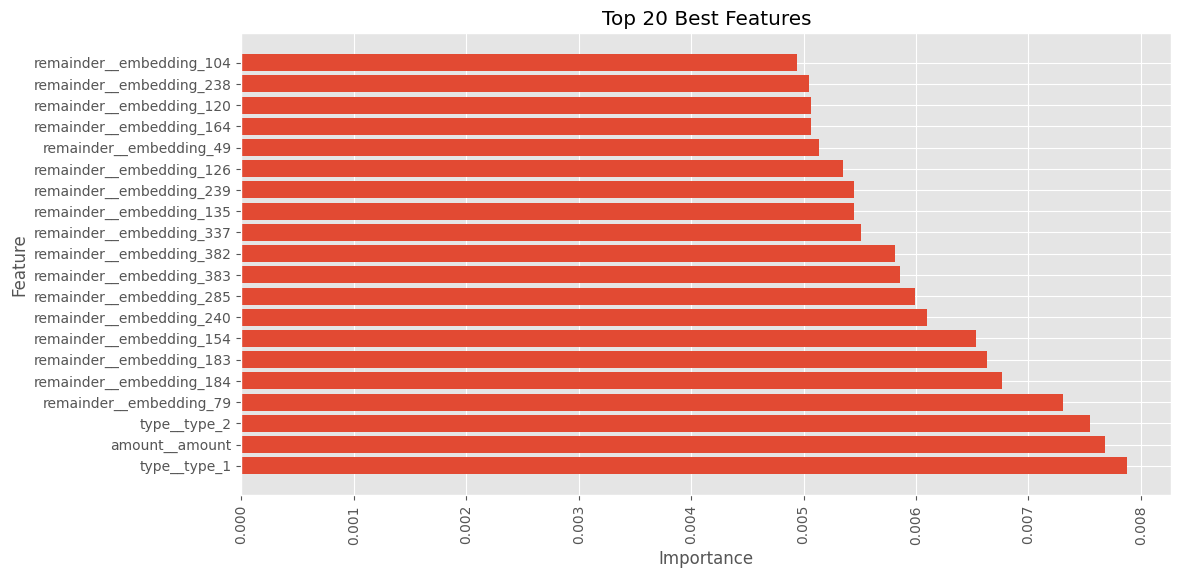

In [47]:
df_importances_sorted = df_importances.sort_values(by='Importance', ascending=False)

# Select the top 20 rows
top_20_features = df_importances_sorted.head(20)

# Plot the top 20 best features
plt.figure(figsize=(12, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Best Features')
plt.show()

In [45]:
# fit model on entire dataset
pipeline.fit(X_new, y)

/home/matrix/Desktop/lady-gpt/venv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('type', OneHotEncoder(),
                                                  ['type']),
                                                 ('amount', RobustScaler(),
                                                  ['amount'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=30, n_estimators=300,
                                        random_state=42))])

In [48]:
from joblib import dump, load
dump(pipeline, '../lady/mono/models/minilm_randomforest_v4.joblib')

['../lady/mono/models/minilm_randomforest_v4.joblib']

In [49]:
model = load('../lady/mono/models/minilm_randomforest_v4.joblib')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('type', OneHotEncoder(),
                                                  ['type']),
                                                 ('amount', RobustScaler(),
                                                  ['amount'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=30, n_estimators=300,
                                        random_state=42))])